In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
patient_num = "2002"

channels = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

# Average Power for Trials

### Average power between conditions across high gamma band for all channel

# Localizer

In [3]:
data = ecogtools.ToM_Localizer(patient_num)

Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif...
This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


Isotrak not found
    Range : 0 ... 4157999 =      0.000 ...  2078.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-1.fif...
Isotrak not found
    Range : 4158000 ... 8315999 =   2079.000 ...  4157.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-2.fif...
Isotrak not found
    Range : 8316000 ... 12473999 =   4158.000 ...  6236.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-3.fif...
Isotrak not found
    Range : 12474000 ... 14399951 =   6237.000 ...  7199.975 secs
Ready.


In [4]:
# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

<Raw  |  john_2002-1.fif, n_channels x n_times : 129 x 664001 (332.0 sec), ~268 kB, data not loaded>

In [5]:
# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

Reading 0 ... 664000  =      0.000 ...   332.000 secs...


<Raw  |  john_2002-1.fif, n_channels x n_times : 12 x 664001 (332.0 sec), ~60.8 MB, data loaded>

In [6]:
data.phys.filter(80, 160)
data.phys.apply_hilbert(envelope=True)

Setting up band-pass filter from 80 - 1.6e+02 Hz
l_trans_bandwidth chosen to be 20.0 Hz
h_trans_bandwidth chosen to be 40.0 Hz
Filter length of 660 samples (0.330 sec) selected


<Raw  |  john_2002-1.fif, n_channels x n_times : 12 x 664001 (332.0 sec), ~60.8 MB, data loaded>

In [7]:
# New epochs object for filtered/HT data
data.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

60 matching events found
0 projection items activated
Loading data for 60 events and 24001 original time points ...
0 bad epochs dropped


In [8]:
data.epochs['b/time_of_resp']

<Epochs  |  n_events : 10 (all good), tmin : -6.0 (s), tmax : 6.0 (s), baseline : None, ~22.0 MB, data loaded>

In [53]:
data.trig_and_behav

,answer,corr_resp,resp_time,response,story,trial_cond,trial_num,trigger_name,cpu_trigger_time,task,trigger,trigger_time,trigger_index
0,False,False,7.672104,True,1,b,1,story_start,23.391590,ToM_Loc,1,2893.6785,5787357
1,False,False,7.672104,True,1,b,1,quest_start,33.446203,ToM_Loc,4,2903.6970,5807394
2,False,False,7.672104,True,1,b,1,time_of_resp,41.118307,ToM_Loc,16,2911.3595,5822719
3,True,True,4.369699,True,1,p,2,story_start,42.306983,ToM_Loc,2,2912.5585,5825117
4,True,True,4.369699,True,1,p,2,quest_start,52.361873,ToM_Loc,5,2922.5930,5845186
5,True,True,4.369699,True,1,p,2,time_of_resp,56.731572,ToM_Loc,17,2926.9705,5853941
6,False,False,6.080487,True,2,p,3,story_start,57.925970,ToM_Loc,2,2928.1685,5856337
7,False,False,6.080487,True,2,p,3,quest_start,67.980575,ToM_Loc,5,2938.1905,5876381
8,False,False,6.080487,True,2,p,3,time_of_resp,74.061062,ToM_Loc,17,2944.2815,5888563
9,True,False,7.986559,False,2,b,4,story_start,75.259718,ToM_Loc,1,2945.4805,5890961


In [55]:
np.mean(data.trig_and_behav)

corr_resp           5.500000e-01
resp_time           4.409172e+00
story               5.500000e+00
trial_num           1.050000e+01
cpu_trigger_time    1.842216e+02
trigger             7.500000e+00
trigger_time        3.054333e+03
trigger_index       6.108665e+06
dtype: float64

In [56]:
tmin = -2
tmax = 0

In [57]:
# Evoked power for Time of Response
belief_tr = data.epochs["b/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()
photo_tr = data.epochs["p/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()

In [58]:
belief_tr.shape

(10, 12, 4001)

In [59]:
all_belief_means = np.mean(belief_tr, axis=2)
all_photo_means = np.mean(photo_tr, axis=2)

all_belief_means = np.swapaxes(all_belief_means, 0, 1)
all_photo_means = np.swapaxes(all_photo_means, 0, 1)

In [60]:
all_means = []
for i in range(len(all_belief_means)):
    all_means.append(all_belief_means[i])
    all_means.append(all_photo_means[i])

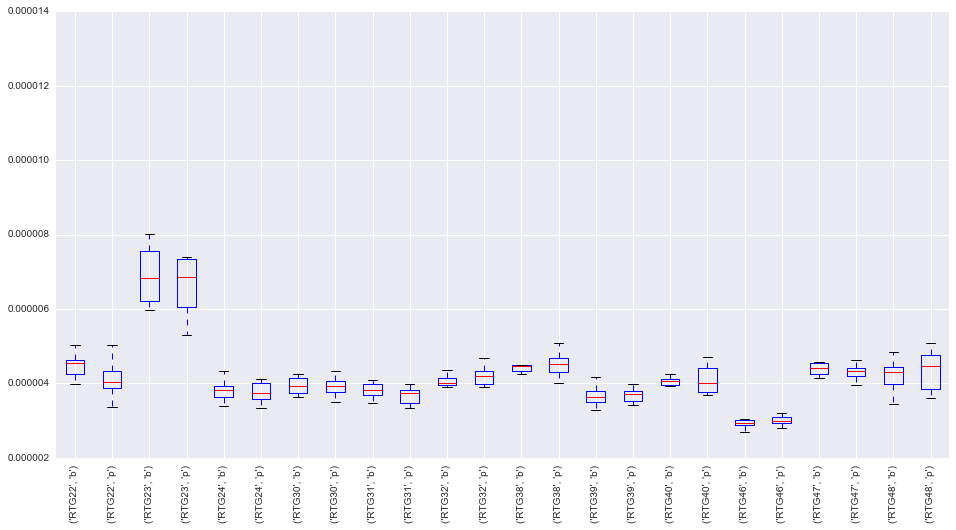

In [61]:
plt.figure(figsize=(16, 8))
plt.boxplot(all_means);
plt.xticks(range(1, len(channels)*2+1), zip(np.repeat(channels, 2), ["b", "p"]*(len(channels))), rotation='vertical');

In [62]:
for i in range(len(channels)):
    print(channels[i], "  ", ttest_ind(all_belief_means[i], all_photo_means[i]))

RTG22    Ttest_indResult(statistic=1.5943548010304347, pvalue=0.12826435193386934)
RTG23    Ttest_indResult(statistic=-0.46013146401164601, pvalue=0.65093152251283892)
RTG24    Ttest_indResult(statistic=0.15393406164622653, pvalue=0.87937445083353094)
RTG30    Ttest_indResult(statistic=0.097324807822217946, pvalue=0.92354397206303029)
RTG31    Ttest_indResult(statistic=1.5074359282923178, pvalue=0.14904926859065099)
RTG32    Ttest_indResult(statistic=-1.5995325252245662, pvalue=0.1271072239963171)
RTG38    Ttest_indResult(statistic=0.31432214689477711, pvalue=0.75689036744938776)
RTG39    Ttest_indResult(statistic=-0.38756703153332778, pvalue=0.70288121328034114)
RTG40    Ttest_indResult(statistic=-0.4220293600443914, pvalue=0.67800130724935659)
RTG46    Ttest_indResult(statistic=-0.75357852900946154, pvalue=0.4608466736517921)
RTG47    Ttest_indResult(statistic=1.3376744595910779, pvalue=0.19765972621405764)
RTG48    Ttest_indResult(statistic=-0.62540336251414075, pvalue=0.53955530093

# 2010 task

In [4]:
data = ecogtools.ToM_2010(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

data.phys.filter(80, 160)
data.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data
data.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

tmin = -1
tmax = 0

# Evoked power for Time of Response
#this was changed to specify mental/expected, physical/expected, mental/unexpected, and physical/unexpected 
ME_tr = data.epochs["mental/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PE_tr = data.epochs["physical/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
MU_tr = data.epochs["mental/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PU_tr = data.epochs["physical/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()

#new code
df_list = []
for pwr, mp, eu in zip([ME_tr, PE_tr, MU_tr, PU_tr], 
                       ['mental', 'physical', 'mental', 'physical'], 
                       ['expected', 'expected', 'unexpected', 'unexpected']):
    dd = pd.DataFrame(np.mean(pwr, axis=2), columns=channels)
    dd = dd.stack().reset_index()
    dd.columns = ['trial', 'channel', 'power']
    dd['mp'] = mp
    dd['eu'] = eu
    df_list.append(dd)
pwr_df = pd.concat(df_list)

pwr_df.boxplot(column='power', by=['channel', 'mp', 'eu'], figsize=(16, 8));
plt.xticks(rotation='vertical');

#new code
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i in channels:
    pwr_lm = ols('power ~ mp + eu', data=pwr_df[pwr_df.channel == i]).fit()
    table = sm.stats.anova_lm(pwr_lm, typ=2)
    print(i)
    print(table)
    print()

Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif...
This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


Isotrak not found
    Range : 0 ... 4157999 =      0.000 ...  2078.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-1.fif...
Isotrak not found
    Range : 4158000 ... 8315999 =   2079.000 ...  4157.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-2.fif...
Isotrak not found
    Range : 8316000 ... 12473999 =   4158.000 ...  6236.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-3.fif...
Isotrak not found
    Range : 12474000 ... 14399951 =   6237.000 ...  7199.975 secs
Ready.
